In [13]:
# CELL 1: SETUP AND IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Setting up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)

print("WORLD HAPPINESS REPORT - TIME TRENDS ANALYSIS")

# Loading the cleaned dataset
print("\nLoading cleaned dataset...")
df = pd.read_csv('../data/processed/happiness_cleaned.csv')
print(f"Cleaned dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Displaying temporal coverage
print(f"\nTemporal Coverage:")
print(f"  Years: {df['Year'].min()}-{df['Year'].max()} ({df['Year'].nunique()} years)")
print(f"  Countries: {df['Country'].nunique()}")
print(f"  Total observations: {len(df):,}")

# Checking data availability by year
yearly_coverage = df.groupby('Year').agg({
    'Country': 'nunique',
    'Happiness score': ['mean', 'std', 'min', 'max']
}).round(3)

yearly_coverage.columns = ['Countries', 'Avg_Happiness', 'Happiness_Std', 'Min_Happiness', 'Max_Happiness']
print(f"\nData Coverage by Year:")
print(yearly_coverage)


WORLD HAPPINESS REPORT - TIME TRENDS ANALYSIS

Loading cleaned dataset...
Cleaned dataset loaded: 1,502 rows × 17 columns

Temporal Coverage:
  Years: 2015-2024 (10 years)
  Countries: 175
  Total observations: 1,502

Data Coverage by Year:
      Countries  Avg_Happiness  Happiness_Std  Min_Happiness  Max_Happiness
Year                                                                       
2015        158          5.376          1.145          2.839          7.587
2016        157          5.382          1.142          2.905          7.526
2017        155          5.354          1.131          2.693          7.537
2018        155          5.373          1.123          2.904          7.632
2019        155          5.405          1.116          2.853          7.769
2020        152          5.473          1.116          2.567          7.809
2021        148          5.533          1.078          2.523          7.842
2022        145          5.554          1.091          2.404          7.821

In [14]:
# CELL 2: GLOBAL HAPPINESS TRENDS
# Analyzing overall global happiness trends over time

print("\nGLOBAL HAPPINESS TRENDS ANALYSIS")
print("Calculating global happiness trends...")

# Calculating global trends
global_trends = df.groupby('Year').agg({
    'Happiness score': ['mean', 'median', 'std'],
    'GDP per capita': 'mean',
    'Social support': 'mean',
    'Healthy life expectancy': 'mean',
    'Freedom to make life choices': 'mean',
    'Generosity': 'mean',
    'Perceptions of corruption': 'mean',
    'Country': 'nunique'
}).round(3)

# Flattening column names
global_trends.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in global_trends.columns]
global_trends = global_trends.reset_index()

print(f"Global trends calculated for {len(global_trends)} years")

# Displaying trend summary
print(f"\nGLOBAL HAPPINESS EVOLUTION:")
print(f"{'Year':<6} | {'Avg Happiness':<13} | {'Countries':<10} | {'Std Dev':<8} | {'Range'}")

for _, row in global_trends.iterrows():
    happiness_range = yearly_coverage.loc[row['Year'], 'Max_Happiness'] - yearly_coverage.loc[row['Year'], 'Min_Happiness']
    print(f"{int(row['Year']):<6} | {row['Happiness score_mean']:<13.3f} | {int(row['Country_nunique']):<10} | "
          f"{row['Happiness score_std']:<8.3f} | {happiness_range:.3f}")

# Calculating overall trend statistics
first_year_happiness = global_trends['Happiness score_mean'].iloc[0]
last_year_happiness = global_trends['Happiness score_mean'].iloc[-1]
total_change = last_year_happiness - first_year_happiness
years_span = global_trends['Year'].iloc[-1] - global_trends['Year'].iloc[0]
annual_change = total_change / years_span

print(f"\nOVERALL TREND SUMMARY:")
print(f"  First year ({int(global_trends['Year'].iloc[0])}): {first_year_happiness:.3f}")
print(f"  Last year ({int(global_trends['Year'].iloc[-1])}): {last_year_happiness:.3f}")
print(f"  Total change: {total_change:+.3f} points")
print(f"  Average annual change: {annual_change:+.4f} points/year")
print(f"  Trend direction: {'Improving' if total_change > 0 else 'Declining' if total_change < 0 else 'Stable'}")

# Testing statistical significance of trend
years = global_trends['Year'].values
happiness_values = global_trends['Happiness score_mean'].values
correlation, p_value = pearsonr(years, happiness_values)

print(f"  Statistical significance: r={correlation:.4f}, p={p_value:.4f}")
if p_value < 0.05:
    print(f"Trend is statistically significant (p < 0.05)")
else:
    print(f"Trend is not statistically significant (p ≥ 0.05)")


GLOBAL HAPPINESS TRENDS ANALYSIS
Calculating global happiness trends...
Global trends calculated for 10 years

GLOBAL HAPPINESS EVOLUTION:
Year   | Avg Happiness | Countries  | Std Dev  | Range
2015   | 5.376         | 158        | 1.145    | 4.748
2016   | 5.382         | 157        | 1.142    | 4.621
2017   | 5.354         | 155        | 1.131    | 4.844
2018   | 5.373         | 155        | 1.123    | 4.728
2019   | 5.405         | 155        | 1.116    | 4.916
2020   | 5.473         | 152        | 1.116    | 5.242
2021   | 5.533         | 148        | 1.078    | 5.319
2022   | 5.554         | 145        | 1.091    | 5.417
2023   | 5.540         | 137        | 1.140    | 5.945
2024   | 5.531         | 140        | 1.181    | 6.020

OVERALL TREND SUMMARY:
  First year (2015): 5.376
  Last year (2024): 5.531
  Total change: +0.155 points
  Average annual change: +0.0172 points/year
  Trend direction: Improving
  Statistical significance: r=0.9090, p=0.0003
Trend is statistically sign


CREATING GLOBAL TRENDS VISUALIZATIONS


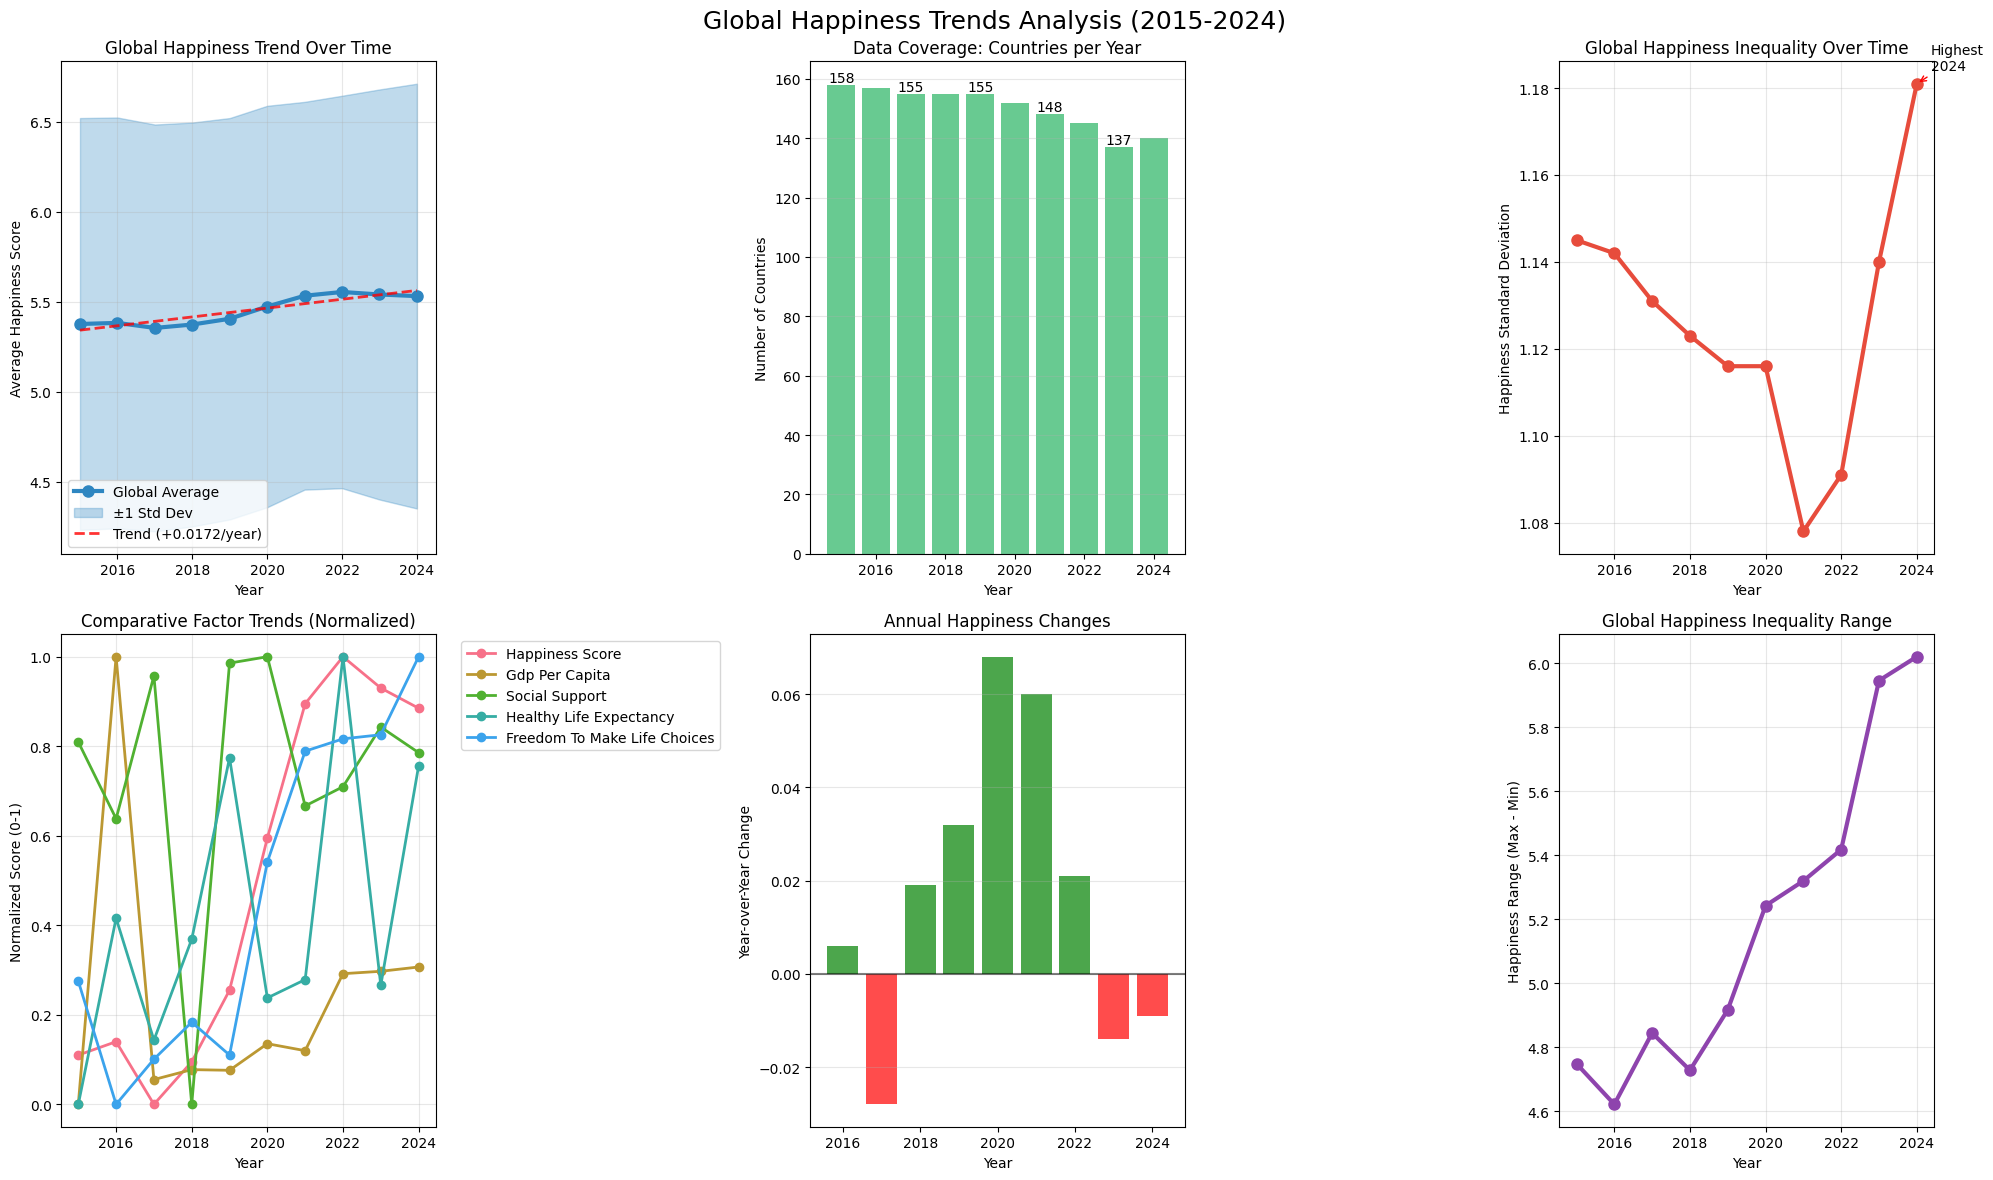

Global trends visualizations created and saved


In [15]:
# CELL 3: GLOBAL TRENDS VISUALIZATION
# Creating comprehensive visualizations of global trends

print("\nCREATING GLOBAL TRENDS VISUALIZATIONS")

# Creating comprehensive global trends figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Global Happiness Trends Analysis (2015-2024)', fontsize=18, y=0.98)

# 1. Main happiness trend with confidence interval
ax1 = axes[0, 0]
years = global_trends['Year']
happiness_mean = global_trends['Happiness score_mean']
happiness_std = global_trends['Happiness score_std']

ax1.plot(years, happiness_mean, 'o-', linewidth=3, markersize=8, color='#2E86C1', label='Global Average')
ax1.fill_between(years, happiness_mean - happiness_std, happiness_mean + happiness_std, 
                alpha=0.3, color='#2E86C1', label='±1 Std Dev')

# Adding trend line
z = np.polyfit(years, happiness_mean, 1)
p = np.poly1d(z)
ax1.plot(years, p(years), "--", color='red', alpha=0.8, linewidth=2, label=f'Trend ({annual_change:+.4f}/year)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Happiness Score')
ax1.set_title('Global Happiness Trend Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(years.min()-0.5, years.max()+0.5)

# 2. Country coverage over time
ax2 = axes[0, 1]
countries_per_year = global_trends['Country_nunique']
ax2.bar(years, countries_per_year, alpha=0.7, color='#28B463')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Countries')
ax2.set_title('Data Coverage: Countries per Year')
ax2.grid(axis='y', alpha=0.3)

# Addding trend annotations
for i, (year, count) in enumerate(zip(years, countries_per_year)):
    if i % 2 == 0:  # Show every other year to avoid crowding
        ax2.annotate(f'{int(count)}', (year, count), ha='center', va='bottom')

# 3. Happiness volatility over time
ax3 = axes[0, 2]
happiness_volatility = global_trends['Happiness score_std']
ax3.plot(years, happiness_volatility, 'o-', linewidth=3, markersize=8, color='#E74C3C')
ax3.set_xlabel('Year')
ax3.set_ylabel('Happiness Standard Deviation')
ax3.set_title('Global Happiness Inequality Over Time')
ax3.grid(True, alpha=0.3)

# Adding annotations for high/low points
max_volatility_year = years[happiness_volatility.idxmax()]
min_volatility_year = years[happiness_volatility.idxmin()]
ax3.annotate(f'Highest\n{max_volatility_year}', 
            (max_volatility_year, happiness_volatility.max()),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'))

# 4. Multi-factor trends comparison
ax4 = axes[1, 0]
factors_to_plot = ['Happiness score_mean', 'GDP per capita_mean', 'Social support_mean', 
                  'Healthy life expectancy_mean', 'Freedom to make life choices_mean']

# Normalizing each factor to 0-1 scale for comparison
for factor in factors_to_plot:
    if factor in global_trends.columns:
        values = global_trends[factor].values
        normalized = (values - values.min()) / (values.max() - values.min())
        factor_name = factor.replace('_mean', '').replace('_', ' ').title()
        ax4.plot(years, normalized, 'o-', linewidth=2, label=factor_name, markersize=6)

ax4.set_xlabel('Year')
ax4.set_ylabel('Normalized Score (0-1)')
ax4.set_title('Comparative Factor Trends (Normalized)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

# 5. Year-over-year changes
ax5 = axes[1, 1]
happiness_changes = happiness_mean.diff()
colors = ['green' if x > 0 else 'red' for x in happiness_changes[1:]]
ax5.bar(years[1:], happiness_changes[1:], color=colors, alpha=0.7)
ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax5.set_xlabel('Year')
ax5.set_ylabel('Year-over-Year Change')
ax5.set_title('Annual Happiness Changes')
ax5.grid(axis='y', alpha=0.3)

# 6. Happiness range (max - min) over time
ax6 = axes[1, 2]
happiness_ranges = []
for year in years:
    year_data = df[df['Year'] == year]['Happiness score']
    happiness_ranges.append(year_data.max() - year_data.min())

ax6.plot(years, happiness_ranges, 'o-', linewidth=3, markersize=8, color='#8E44AD')
ax6.set_xlabel('Year')
ax6.set_ylabel('Happiness Range (Max - Min)')
ax6.set_title('Global Happiness Inequality Range')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/global_happiness_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Global trends visualizations created and saved")

In [16]:
# CELL 4: REGIONAL TRENDS ANALYSIS
# Analyzing happiness trends within different regions

print("\nREGIONAL TRENDS ANALYSIS")
print("Analyzing happiness trends by region...")

# Calculating regional trends
regions = df['Regional indicator'].dropna().unique()
regional_trends = {}

for region in regions:
    region_data = df[df['Regional indicator'] == region].groupby('Year').agg({
        'Happiness score': ['mean', 'std', 'count'],
        'GDP per capita': 'mean',
        'Social support': 'mean',
        'Healthy life expectancy': 'mean',
        'Freedom to make life choices': 'mean'
    }).round(3)
    
    # Flattening column names
    region_data.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in region_data.columns]
    regional_trends[region] = region_data

print(f"Regional trends calculated for {len(regions)} regions")

# Calculating trend statistics for each region
print(f"\nREGIONAL TREND SUMMARY:")
print(f"{'Region':<25} | {'Start':<6} | {'End':<6} | {'Change':<8} | {'Annual':<8} | {'Trend'}")

regional_trend_stats = []

for region, trend_data in regional_trends.items():
    if len(trend_data) >= 3:  # Need at least 3 years for trend analysis
        years_available = trend_data.index
        first_happiness = trend_data['Happiness score_mean'].iloc[0]
        last_happiness = trend_data['Happiness score_mean'].iloc[-1]
        total_change = last_happiness - first_happiness
        years_span = years_available[-1] - years_available[0]
        annual_change = total_change / years_span if years_span > 0 else 0
        
        # Testing statistical significance
        correlation, p_value = pearsonr(years_available, trend_data['Happiness score_mean'])
        is_significant = p_value < 0.05
        
        trend_direction = 'Improving' if total_change > 0.01 else 'Declining' if total_change < -0.01 else 'Stable'
        significance_marker = '*' if is_significant else ''
        
        regional_trend_stats.append({
            'Region': region,
            'Start_Happiness': first_happiness,
            'End_Happiness': last_happiness,
            'Total_Change': total_change,
            'Annual_Change': annual_change,
            'Trend': trend_direction,
            'Significant': is_significant,
            'Correlation': correlation,
            'P_Value': p_value
        })
        
        region_short = region[:24]
        print(f"{region_short:<25} | {first_happiness:<6.3f} | {last_happiness:<6.3f} | "
              f"{total_change:>+7.3f} | {annual_change:>+7.4f} | {trend_direction}{significance_marker}")

regional_trend_df = pd.DataFrame(regional_trend_stats)

# Identifying best and worst performing regions
if len(regional_trend_df) > 0:
    best_improving = regional_trend_df.loc[regional_trend_df['Total_Change'].idxmax()]
    worst_declining = regional_trend_df.loc[regional_trend_df['Total_Change'].idxmin()]
    
    print(f"\nBest Improving Region: {best_improving['Region']} (+{best_improving['Total_Change']:.3f} points)")
    print(f"Most Declining Region: {worst_declining['Region']} ({worst_declining['Total_Change']:+.3f} points)")


REGIONAL TRENDS ANALYSIS
Analyzing happiness trends by region...
Regional trends calculated for 10 regions

REGIONAL TREND SUMMARY:
Region                    | Start  | End    | Change   | Annual   | Trend
South Asia                | 4.581  | 3.896  |  -0.685 | -0.0761 | Declining*
Central and Eastern Euro  | 5.366  | 6.029  |  +0.663 | +0.0737 | Improving*
Middle East and North Af  | 5.407  | 5.165  |  -0.242 | -0.0269 | Declining*
Sub-Saharan Africa        | 4.203  | 4.354  |  +0.151 | +0.0168 | Improving*
Latin America and Caribb  | 6.145  | 6.143  |  -0.002 | -0.0002 | Stable
Commonwealth of Independ  | 5.286  | 5.536  |  +0.250 | +0.0278 | Improving*
North America and ANZ     | 7.279  | 6.928  |  -0.351 | -0.0390 | Declining*
Western Europe            | 6.690  | 6.836  |  +0.146 | +0.0162 | Improving*
Southeast Asia            | 5.317  | 5.604  |  +0.287 | +0.0319 | Improving*
East Asia                 | 5.626  | 5.821  |  +0.195 | +0.0217 | Improving

Best Improving Region: Cent


CREATING REGIONAL TRENDS VISUALIZATIONS


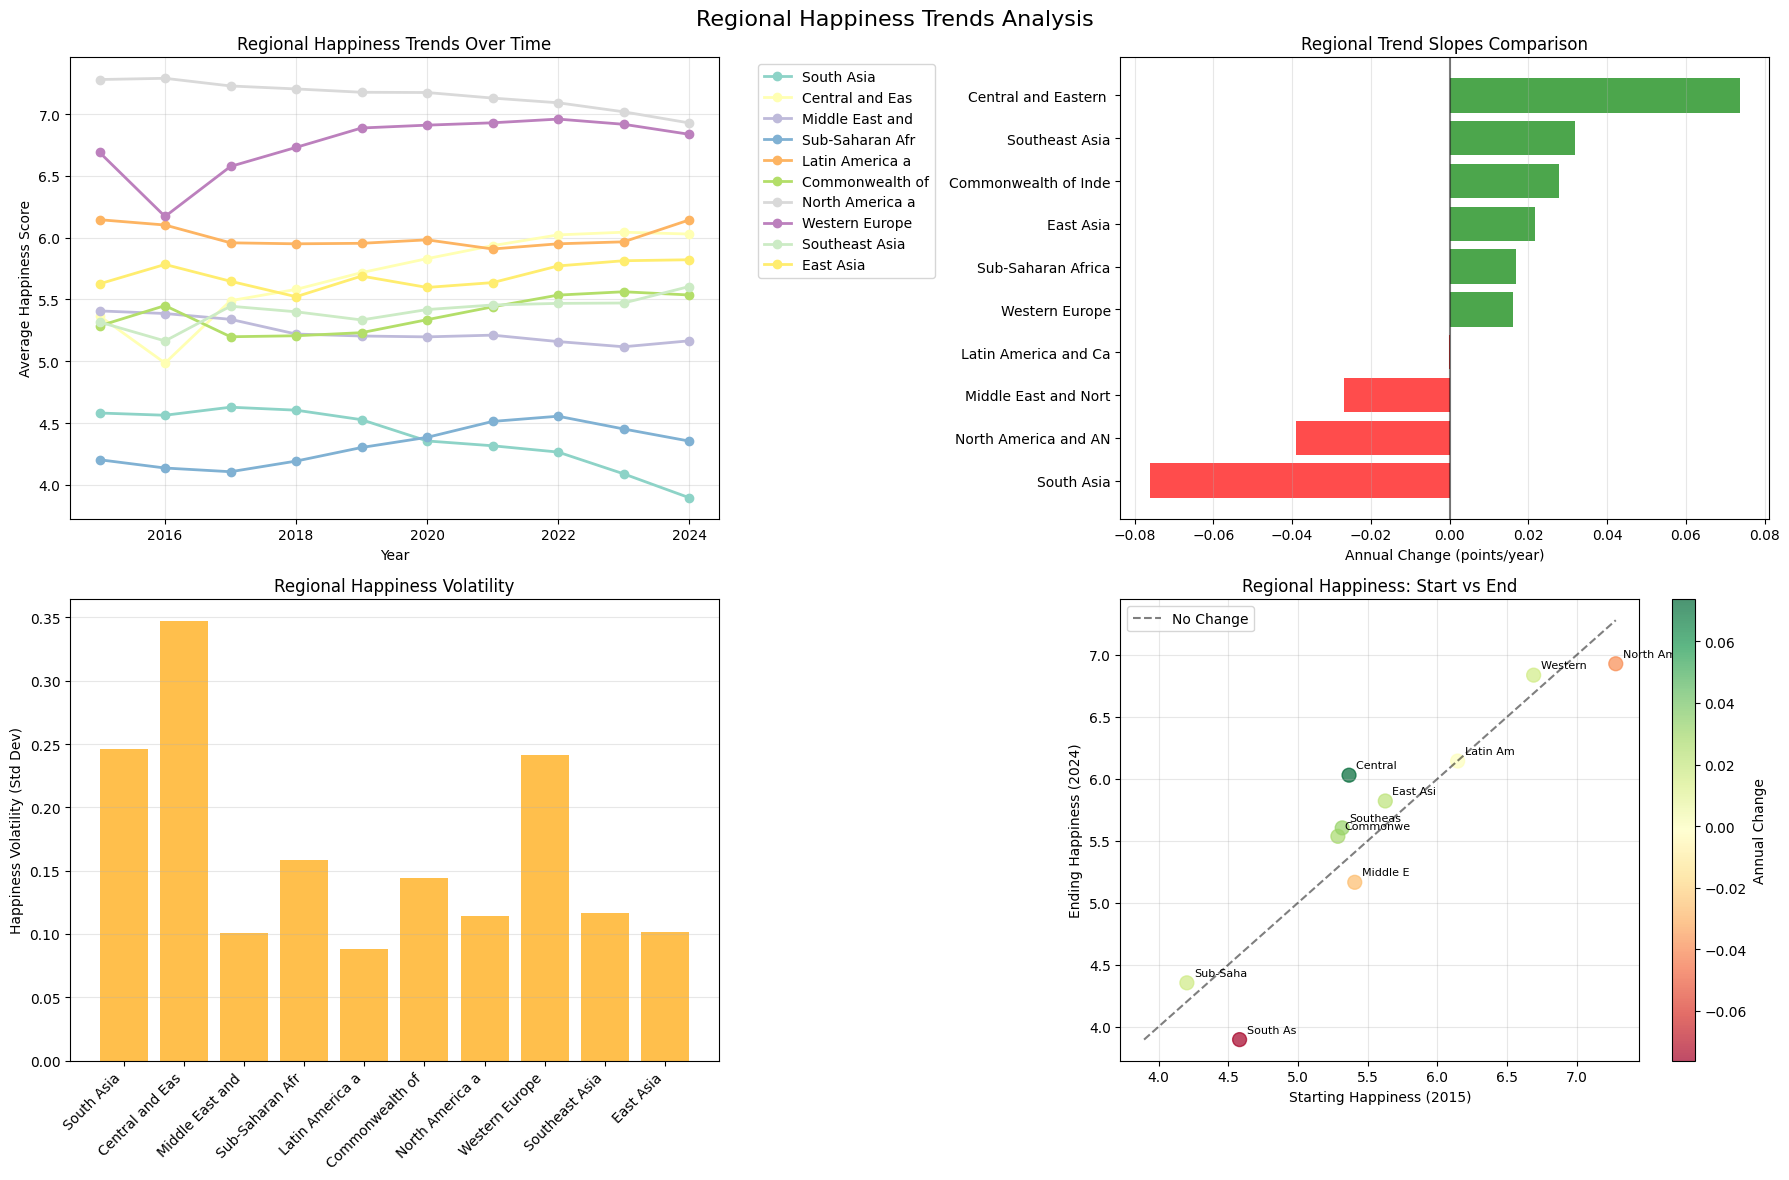

Regional trends visualizations created and saved


In [17]:
# CELL 5: REGIONAL TRENDS VISUALIZATION
# Creating visualizations for regional happiness trends

print("\nCREATING REGIONAL TRENDS VISUALIZATIONS")

# Creating regional trends visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Regional Happiness Trends Analysis', fontsize=16, y=0.98)

# 1. All regional trends in one plot
ax1 = axes[0, 0]
colors = plt.cm.Set3(np.linspace(0, 1, len(regional_trends)))

for i, (region, trend_data) in enumerate(regional_trends.items()):
    if len(trend_data) >= 3:
        years = trend_data.index
        happiness = trend_data['Happiness score_mean']
        ax1.plot(years, happiness, 'o-', linewidth=2, label=region[:15], 
                color=colors[i], markersize=6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Happiness Score')
ax1.set_title('Regional Happiness Trends Over Time')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Regional trend slopes comparison
ax2 = axes[0, 1]
if len(regional_trend_df) > 0:
    regional_trend_df_sorted = regional_trend_df.sort_values('Annual_Change', ascending=True)
    colors = ['red' if x < 0 else 'green' for x in regional_trend_df_sorted['Annual_Change']]
    
    bars = ax2.barh(range(len(regional_trend_df_sorted)), regional_trend_df_sorted['Annual_Change'], 
                    color=colors, alpha=0.7)
    ax2.set_yticks(range(len(regional_trend_df_sorted)))
    ax2.set_yticklabels([r[:20] for r in regional_trend_df_sorted['Region']], fontsize=10)
    ax2.set_xlabel('Annual Change (points/year)')
    ax2.set_title('Regional Trend Slopes Comparison')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)
    ax2.grid(axis='x', alpha=0.3)

# 3. Regional happiness volatility
ax3 = axes[1, 0]
regional_volatility = {}
for region, trend_data in regional_trends.items():
    if len(trend_data) >= 3:
        volatility = trend_data['Happiness score_mean'].std()
        regional_volatility[region] = volatility

if regional_volatility:
    regions_vol = list(regional_volatility.keys())
    volatility_values = list(regional_volatility.values())
    
    bars = ax3.bar(range(len(regions_vol)), volatility_values, alpha=0.7, color='orange')
    ax3.set_xticks(range(len(regions_vol)))
    ax3.set_xticklabels([r[:15] for r in regions_vol], rotation=45, ha='right')
    ax3.set_ylabel('Happiness Volatility (Std Dev)')
    ax3.set_title('Regional Happiness Volatility')
    ax3.grid(axis='y', alpha=0.3)

# 4. Start vs End happiness levels by region
ax4 = axes[1, 1]
if len(regional_trend_df) > 0:
    scatter = ax4.scatter(regional_trend_df['Start_Happiness'], regional_trend_df['End_Happiness'],
                         c=regional_trend_df['Annual_Change'], cmap='RdYlGn', s=100, alpha=0.7)
    
    # Adding diagonal line (no change)
    min_val = min(regional_trend_df['Start_Happiness'].min(), regional_trend_df['End_Happiness'].min())
    max_val = max(regional_trend_df['Start_Happiness'].max(), regional_trend_df['End_Happiness'].max())
    ax4.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='No Change')
    
    # Adding annotations for regions
    for _, row in regional_trend_df.iterrows():
        ax4.annotate(row['Region'][:8], (row['Start_Happiness'], row['End_Happiness']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    ax4.set_xlabel('Starting Happiness (2015)')
    ax4.set_ylabel('Ending Happiness (2024)')
    ax4.set_title('Regional Happiness: Start vs End')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax4, label='Annual Change')

plt.tight_layout()
plt.savefig('../outputs/figures/regional_happiness_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Regional trends visualizations created and saved")

In [18]:
# CELL 6: INDIVIDUAL COUNTRY TRAJECTORIES
# Analyzing happiness trajectories for specific countrie

print("\nINDIVIDUAL COUNTRY TRAJECTORIES ANALYSIS")

print("Analyzing individual country happiness trajectories...")

# Calculating country-level trends for countries with sufficient data
country_trends = {}
min_years = 5  # Minimum years required for trend analysis

countries_with_data = df['Country'].value_counts()
reliable_countries = countries_with_data[countries_with_data >= min_years].index

print(f"Countries with ≥{min_years} years of data: {len(reliable_countries)}")

# Calculating trends for reliable countries
country_trend_stats = []

for country in reliable_countries:
    country_data = df[df['Country'] == country].sort_values('Year')
    
    if len(country_data) >= min_years:
        years = country_data['Year'].values
        happiness = country_data['Happiness score'].values
        
        # Calculating trend statistics
        first_happiness = happiness[0]
        last_happiness = happiness[-1]
        total_change = last_happiness - first_happiness
        years_span = years[-1] - years[0]
        annual_change = total_change / years_span if years_span > 0 else 0
        
        # Statistical significance test
        correlation, p_value = pearsonr(years, happiness)
        is_significant = p_value < 0.05
        
        # Volatility
        volatility = np.std(happiness)
        
        # Trend direction
        trend_direction = 'Improving' if total_change > 0.05 else 'Declining' if total_change < -0.05 else 'Stable'
        
        country_trend_stats.append({
            'Country': country,
            'Years_Data': len(country_data),
            'Start_Happiness': first_happiness,
            'End_Happiness': last_happiness,
            'Total_Change': total_change,
            'Annual_Change': annual_change,
            'Volatility': volatility,
            'Trend': trend_direction,
            'Correlation': correlation,
            'P_Value': p_value,
            'Significant': is_significant,
            'Region': country_data['Regional indicator'].iloc[0] if 'Regional indicator' in country_data.columns else 'Unknown'
        })

country_trends_df = pd.DataFrame(country_trend_stats)

print(f"Analyzed trends for {len(country_trends_df)} countries")

# Identifying different trajectory patterns
print(f"\nCOUNTRY TRAJECTORY PATTERNS:")

# Most improving countries
most_improving = country_trends_df.nlargest(10, 'Total_Change')
print(f"\nMOST IMPROVING COUNTRIES:")
print(f"{'Country':<20} | {'Change':<8} | {'Annual':<8} | {'Start':<6} | {'End':<6} | {'Significant'}")

for _, row in most_improving.iterrows():
    sig_marker = "Yes*" if row['Significant'] else "No"
    print(f"{row['Country']:<20} | {row['Total_Change']:>+7.3f} | {row['Annual_Change']:>+7.4f} | "
          f"{row['Start_Happiness']:<6.3f} | {row['End_Happiness']:<6.3f} | {sig_marker}")

# Most declining countries  
most_declining = country_trends_df.nsmallest(10, 'Total_Change')
print(f"\nMOST DECLINING COUNTRIES:")
print(f"{'Country':<20} | {'Change':<8} | {'Annual':<8} | {'Start':<6} | {'End':<6} | {'Significant'}")

for _, row in most_declining.iterrows():
    sig_marker = "Yes*" if row['Significant'] else "No"
    print(f"{row['Country']:<20} | {row['Total_Change']:>+7.3f} | {row['Annual_Change']:>+7.4f} | "
          f"{row['Start_Happiness']:<6.3f} | {row['End_Happiness']:<6.3f} | {sig_marker}")

# Most volatile countries
most_volatile = country_trends_df.nlargest(10, 'Volatility')
print(f"\nMOST VOLATILE COUNTRIES:")
print(f"{'Country':<20} | {'Volatility':<10} | {'Range':<8} | {'Trend'}")

for _, row in most_volatile.iterrows():
    happiness_range = row['End_Happiness'] - row['Start_Happiness']
    print(f"{row['Country']:<20} | {row['Volatility']:<10.3f} | {happiness_range:>+7.3f} | {row['Trend']}")


INDIVIDUAL COUNTRY TRAJECTORIES ANALYSIS
Analyzing individual country happiness trajectories...
Countries with ≥5 years of data: 153
Analyzed trends for 153 countries

COUNTRY TRAJECTORY PATTERNS:

MOST IMPROVING COUNTRIES:
Country              | Change   | Annual   | Start  | End    | Significant
Ivory Coast          |  +1.425 | +0.1583 | 3.655  | 5.080  | Yes*
Togo                 |  +1.375 | +0.1528 | 2.839  | 4.214  | Yes*
Guinea               |  +1.367 | +0.1519 | 3.656  | 5.023  | Yes*
Romania              |  +1.367 | +0.1519 | 5.124  | 6.491  | Yes*
Serbia               |  +1.288 | +0.1431 | 5.123  | 6.411  | Yes*
Bulgaria             |  +1.245 | +0.1383 | 4.218  | 5.463  | Yes*
Congo (Brazzaville)  |  +1.232 | +0.1369 | 3.989  | 5.221  | Yes*
Hungary              |  +1.217 | +0.1352 | 4.800  | 6.017  | Yes*
Gabon                |  +1.210 | +0.1345 | 3.896  | 5.106  | Yes*
Honduras             |  +1.180 | +0.1312 | 4.788  | 5.968  | Yes*

MOST DECLINING COUNTRIES:
Country      


CREATING COUNTRY TRAJECTORIES VISUALIZATIONS


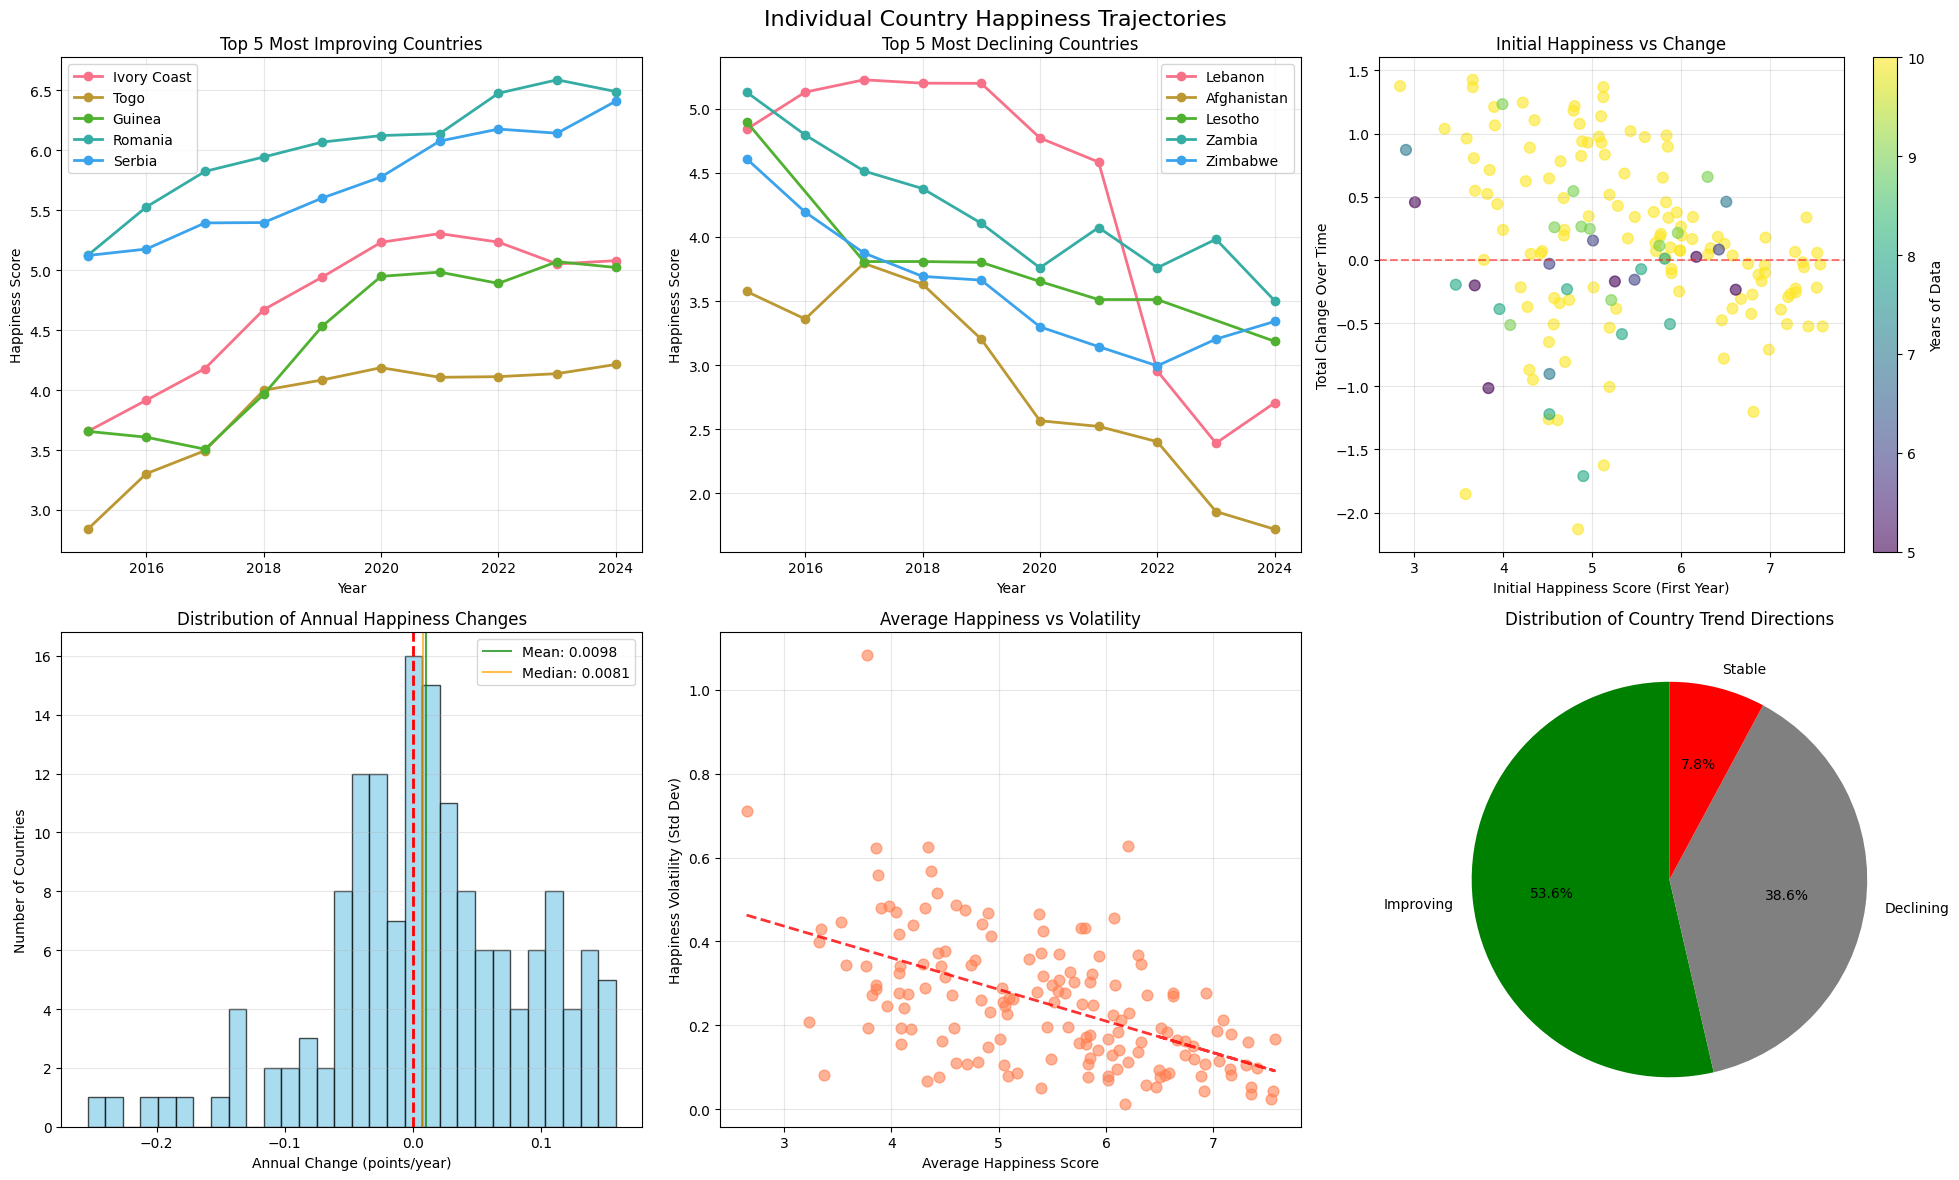

Country trajectories visualizations created and saved


In [19]:
# CELL 7: COUNTRY TRAJECTORIES VISUALIZATION
# Creating visualizations for individual country trends

print("\nCREATING COUNTRY TRAJECTORIES VISUALIZATIONS")

# Creating country trajectories visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Individual Country Happiness Trajectories', fontsize=16, y=0.98)

# 1. Top improvers trajectories
ax1 = axes[0, 0]
top_improvers = most_improving.head(5)

for _, country_info in top_improvers.iterrows():
    country_data = df[df['Country'] == country_info['Country']].sort_values('Year')
    ax1.plot(country_data['Year'], country_data['Happiness score'], 'o-', 
            linewidth=2, label=country_info['Country'], markersize=6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Happiness Score')
ax1.set_title('Top 5 Most Improving Countries')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Top decliners trajectories
ax2 = axes[0, 1]
top_decliners = most_declining.head(5)

for _, country_info in top_decliners.iterrows():
    country_data = df[df['Country'] == country_info['Country']].sort_values('Year')
    ax2.plot(country_data['Year'], country_data['Happiness score'], 'o-', 
            linewidth=2, label=country_info['Country'], markersize=6)

ax2.set_xlabel('Year')
ax2.set_ylabel('Happiness Score')
ax2.set_title('Top 5 Most Declining Countries')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Change vs Initial Happiness scatter
ax3 = axes[0, 2]
scatter = ax3.scatter(country_trends_df['Start_Happiness'], country_trends_df['Total_Change'],
                     c=country_trends_df['Years_Data'], cmap='viridis', alpha=0.6, s=60)

ax3.set_xlabel('Initial Happiness Score (First Year)')
ax3.set_ylabel('Total Change Over Time')
ax3.set_title('Initial Happiness vs Change')
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Years of Data')

# 4. Annual change distribution
ax4 = axes[1, 0]
ax4.hist(country_trends_df['Annual_Change'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Annual Change (points/year)')
ax4.set_ylabel('Number of Countries')
ax4.set_title('Distribution of Annual Happiness Changes')
ax4.grid(axis='y', alpha=0.3)

# Addding statistics
mean_change = country_trends_df['Annual_Change'].mean()
median_change = country_trends_df['Annual_Change'].median()
ax4.axvline(x=mean_change, color='green', linestyle='-', alpha=0.7, label=f'Mean: {mean_change:.4f}')
ax4.axvline(x=median_change, color='orange', linestyle='-', alpha=0.7, label=f'Median: {median_change:.4f}')
ax4.legend()

# 5. Volatility vs Average Happiness
ax5 = axes[1, 1]
# Calculating average happiness for each country
country_avg_happiness = country_trends_df[['Country', 'Start_Happiness', 'End_Happiness']].copy()
country_avg_happiness['Avg_Happiness'] = (country_avg_happiness['Start_Happiness'] + country_avg_happiness['End_Happiness']) / 2

scatter2 = ax5.scatter(country_avg_happiness['Avg_Happiness'], country_trends_df['Volatility'],
                      alpha=0.6, s=60, c='coral')

ax5.set_xlabel('Average Happiness Score')
ax5.set_ylabel('Happiness Volatility (Std Dev)')
ax5.set_title('Average Happiness vs Volatility')
ax5.grid(True, alpha=0.3)

# Adding trend line
z = np.polyfit(country_avg_happiness['Avg_Happiness'], country_trends_df['Volatility'], 1)
p = np.poly1d(z)
ax5.plot(country_avg_happiness['Avg_Happiness'], p(country_avg_happiness['Avg_Happiness']), 
         "r--", alpha=0.8, linewidth=2)

# 6. Trend significance analysis
ax6 = axes[1, 2]
trend_counts = country_trends_df['Trend'].value_counts()
colors_trend = ['green', 'gray', 'red']
ax6.pie(trend_counts.values, labels=trend_counts.index, autopct='%1.1f%%', 
        colors=colors_trend, startangle=90)
ax6.set_title('Distribution of Country Trend Directions')

plt.tight_layout()
plt.savefig('../outputs/figures/country_trajectories_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Country trajectories visualizations created and saved")

In [20]:
# CELL 8: TIME PERIOD ANALYSIS
# Analyzing happiness trends across different time periods

print("\nTIME PERIOD ANALYSIS")

print("Analyzing happiness patterns across different time periods...")

# Defining time periods for analysis
periods = {
    'Early Period': [2015, 2016, 2017],
    'Mid Period': [2018, 2019, 2020],
    'Late Period': [2021, 2022, 2023, 2024]
}

# Calculating period averages
period_analysis = {}

for period_name, years in periods.items():
    period_data = df[df['Year'].isin(years)]
    
    if len(period_data) > 0:
        period_stats = {
            'Countries': period_data['Country'].nunique(),
            'Total_Observations': len(period_data),
            'Avg_Happiness': period_data['Happiness score'].mean(),
            'Std_Happiness': period_data['Happiness score'].std(),
            'Min_Happiness': period_data['Happiness score'].min(),
            'Max_Happiness': period_data['Happiness score'].max(),
            'Avg_GDP': period_data['GDP per capita'].mean(),
            'Avg_Social': period_data['Social support'].mean(),
            'Avg_Health': period_data['Healthy life expectancy'].mean(),
            'Avg_Freedom': period_data['Freedom to make life choices'].mean(),
            'Years': years
        }
        period_analysis[period_name] = period_stats

print(f"Period analysis completed for {len(period_analysis)} periods")

# Displaying period comparison
print(f"\nTIME PERIOD COMPARISON:")
print("─" * 80)
print(f"{'Period':<12} | {'Years':<15} | {'Happiness':<10} | {'Countries':<10} | {'Range'}")
print("─" * 80)

for period, stats in period_analysis.items():
    years_str = f"{min(stats['Years'])}-{max(stats['Years'])}"
    happiness_range = stats['Max_Happiness'] - stats['Min_Happiness']
    print(f"{period:<12} | {years_str:<15} | {stats['Avg_Happiness']:<10.3f} | "
          f"{stats['Countries']:<10} | {happiness_range:.3f}")

# Statistical comparison between periods
print(f"\nPERIOD-TO-PERIOD CHANGES:")
periods_list = list(period_analysis.keys())
for i in range(len(periods_list) - 1):
    current_period = periods_list[i]
    next_period = periods_list[i + 1]
    
    current_happiness = period_analysis[current_period]['Avg_Happiness']
    next_happiness = period_analysis[next_period]['Avg_Happiness']
    change = next_happiness - current_happiness
    
    print(f"  {current_period} → {next_period}: {change:+.3f} points")

# Identifying major events or turning points
print(f"\nPOTENTIAL TURNING POINTS:")
yearly_happiness = df.groupby('Year')['Happiness score'].mean()
year_changes = yearly_happiness.diff()

# Finding years with largest changes
largest_increases = year_changes.nlargest(3)
largest_decreases = year_changes.nsmallest(3)

print(f"Largest year-over-year increases:")
for year, change in largest_increases.items():
    if not np.isnan(change):
        print(f"    {int(year)}: +{change:.3f} points")

print(f"Largest year-over-year decreases:")
for year, change in largest_decreases.items():
    if not np.isnan(change):
        print(f"{int(year)}: {change:.3f} points")


TIME PERIOD ANALYSIS
Analyzing happiness patterns across different time periods...
Period analysis completed for 3 periods

TIME PERIOD COMPARISON:
────────────────────────────────────────────────────────────────────────────────
Period       | Years           | Happiness  | Countries  | Range
────────────────────────────────────────────────────────────────────────────────
Early Period | 2015-2017       | 5.371      | 166        | 4.894
Mid Period   | 2018-2020       | 5.417      | 162        | 5.242
Late Period  | 2021-2024       | 5.539      | 155        | 6.121

PERIOD-TO-PERIOD CHANGES:
  Early Period → Mid Period: +0.046 points
  Mid Period → Late Period: +0.123 points

POTENTIAL TURNING POINTS:
Largest year-over-year increases:
    2020: +0.068 points
    2021: +0.060 points
    2019: +0.032 points
Largest year-over-year decreases:
2017: -0.028 points
2023: -0.014 points
2024: -0.009 points



HAPPINESS FACTORS TRENDS ANALYSIS
Analyzing trends in individual happiness factors...
Factor trends calculated for 6 factors

FACTOR TREND ANALYSIS:
Factor                         | Start    | End      | Change   | Trend
GDP per capita                 | 5.005    | 6.441    |  +1.436 | Improving
Social support                 | 0.707    | 0.702    |  -0.005 | Declining
Healthy life expectancy        | 61.500   | 70.829   |  +9.329 | Improving
Freedom to make life choices   | 0.640    | 0.719    |  +0.079 | Improving*
Generosity                     | 0.298    | 0.365    |  +0.067 | Improving*
Perceptions of corruption      | 0.740    | 0.268    |  -0.472 | Declining

Creating factor trends visualization...


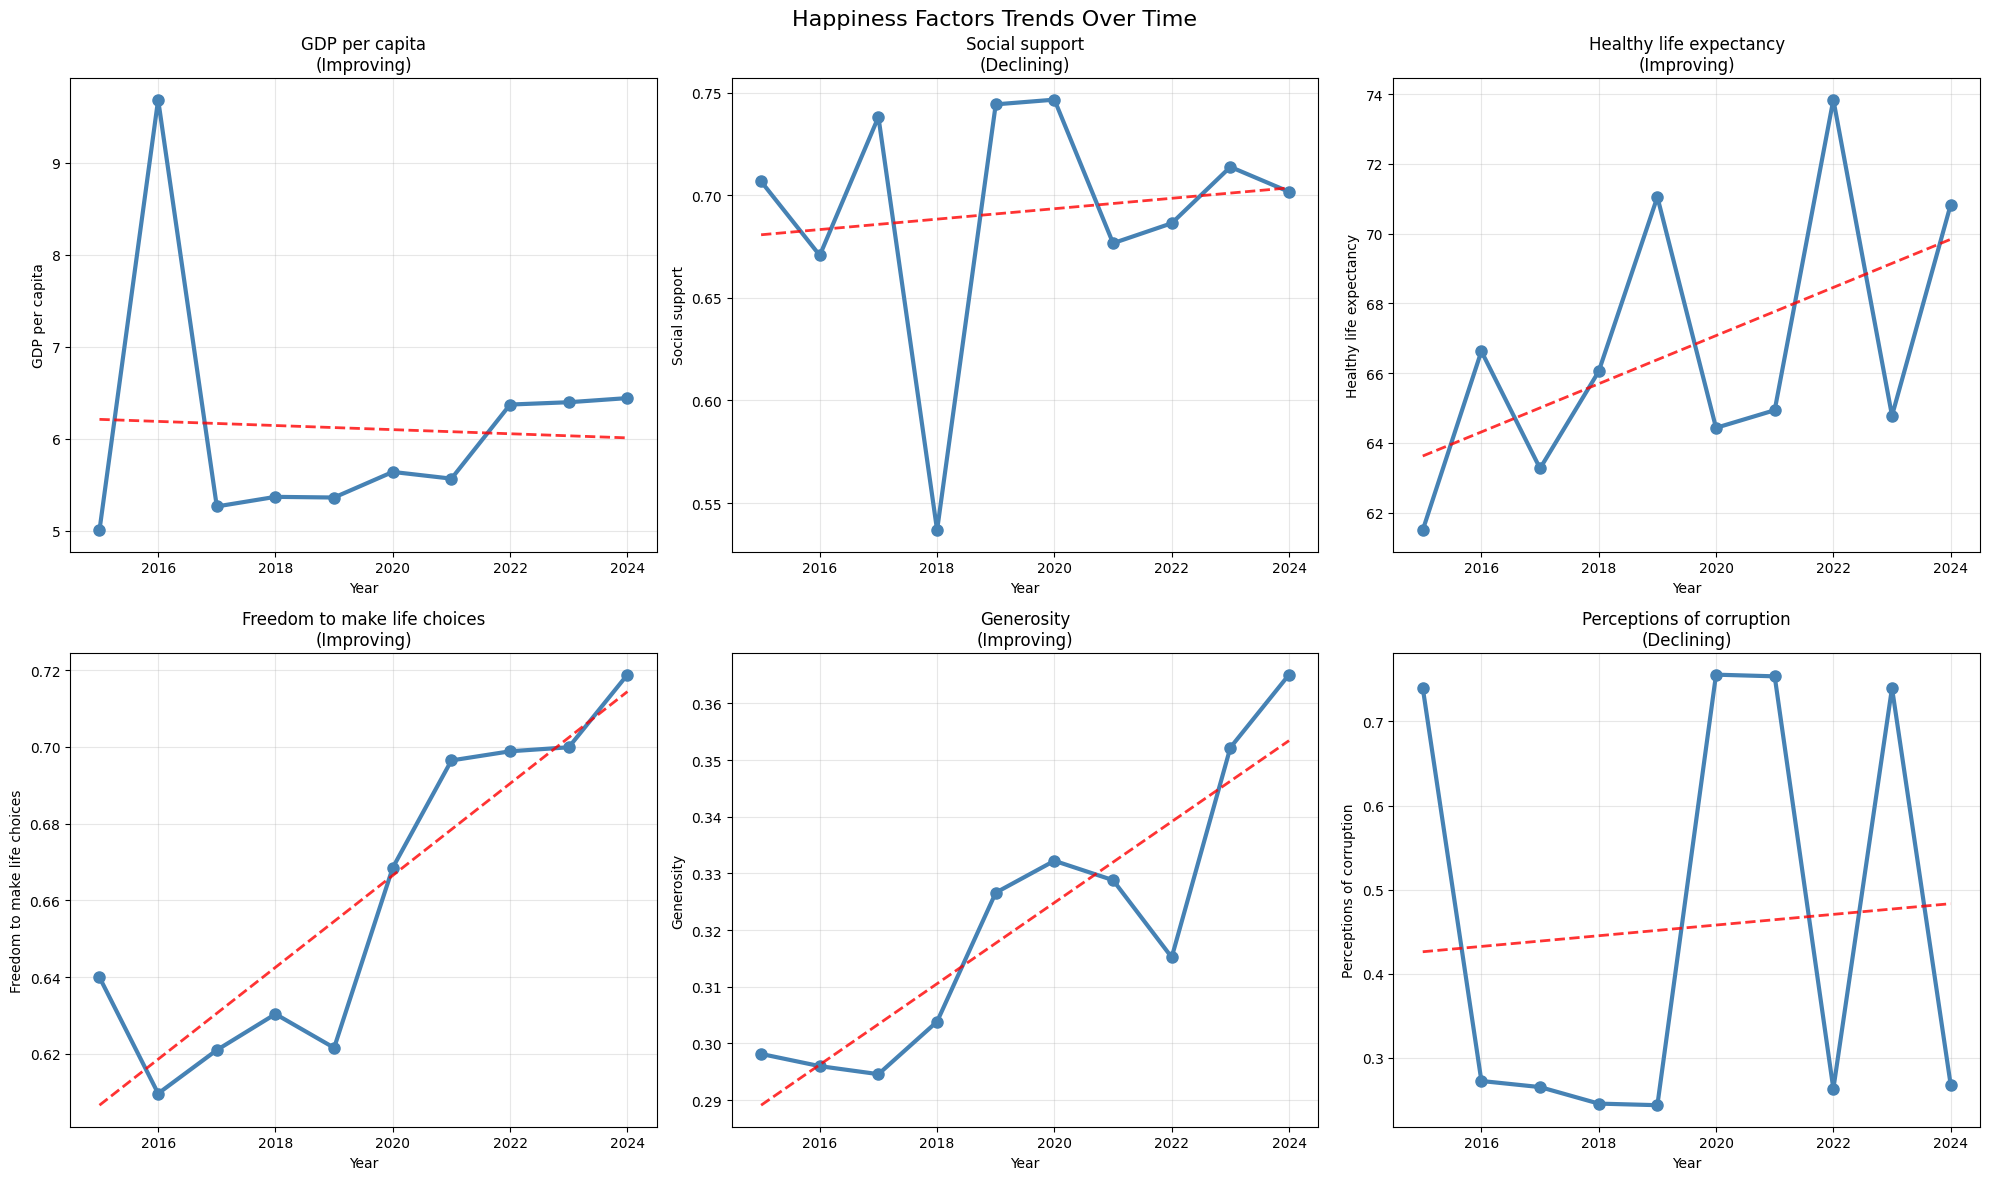

Factor trends visualization created and saved

MOST IMPROVING FACTORS:
Healthy life expectancy: +9.329
GDP per capita: +1.436
Freedom to make life choices: +0.079*
Generosity: +0.067*

MOST DECLINING FACTORS:
Perceptions of corruption: -0.472
Social support: -0.005


In [21]:
# CELL 9: FACTOR TRENDS ANALYSIS
# Analyzing how different happiness factors have evolved over time

print("\nHAPPINESS FACTORS TRENDS ANALYSIS")

print("Analyzing trends in individual happiness factors...")

# Defining happiness factors to analyze
happiness_factors = [
    'GDP per capita',
    'Social support', 
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Calculating factor trends over time
factor_trends = df.groupby('Year')[happiness_factors].mean()

print(f"Factor trends calculated for {len(happiness_factors)} factors")

# Calculating trend statistics for each factor
print(f"\nFACTOR TREND ANALYSIS:")
print(f"{'Factor':<30} | {'Start':<8} | {'End':<8} | {'Change':<8} | {'Trend'}")

factor_trend_stats = {}

for factor in happiness_factors:
    if factor in factor_trends.columns:
        years = factor_trends.index
        values = factor_trends[factor]
        
        first_value = values.iloc[0]
        last_value = values.iloc[-1]
        total_change = last_value - first_value
        
        # Testing statistical significance
        correlation, p_value = pearsonr(years, values)
        is_significant = p_value < 0.05
        
        trend_direction = 'Improving' if total_change > 0 else 'Declining' if total_change < 0 else 'Stable'
        significance_marker = '*' if is_significant else ''
        
        factor_trend_stats[factor] = {
            'Start_Value': first_value,
            'End_Value': last_value,
            'Total_Change': total_change,
            'Trend': trend_direction,
            'Correlation': correlation,
            'P_Value': p_value,
            'Significant': is_significant
        }
        
        print(f"{factor:<30} | {first_value:<8.3f} | {last_value:<8.3f} | "
              f"{total_change:>+7.3f} | {trend_direction}{significance_marker}")

# Creating factor trends visualization
print(f"\nCreating factor trends visualization...")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Happiness Factors Trends Over Time', fontsize=16, y=0.98)

axes_flat = axes.flatten()

for i, factor in enumerate(happiness_factors):
    if i < len(axes_flat) and factor in factor_trends.columns:
        ax = axes_flat[i]
        
        years = factor_trends.index
        values = factor_trends[factor]
        
        # Plotting trend line
        ax.plot(years, values, 'o-', linewidth=3, markersize=8, color='steelblue')
        
        # Adding linear trend line
        z = np.polyfit(years, values, 1)
        p = np.poly1d(z)
        trend_line = p(years)
        ax.plot(years, trend_line, "--", color='red', alpha=0.8, linewidth=2)
        
        # Customizing plot
        ax.set_xlabel('Year')
        ax.set_ylabel(factor)
        ax.set_title(f'{factor}\n({factor_trend_stats[factor]["Trend"]})')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(years.min()-0.5, years.max()+0.5)

plt.tight_layout()
plt.savefig('../outputs/figures/happiness_factors_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Factor trends visualization created and saved")

# Identifying which factors are most/least improving
improving_factors = [(k, v['Total_Change']) for k, v in factor_trend_stats.items() if v['Total_Change'] > 0]
declining_factors = [(k, v['Total_Change']) for k, v in factor_trend_stats.items() if v['Total_Change'] < 0]

improving_factors.sort(key=lambda x: x[1], reverse=True)
declining_factors.sort(key=lambda x: x[1])

print(f"\nMOST IMPROVING FACTORS:")
for factor, change in improving_factors:
    sig_marker = "*" if factor_trend_stats[factor]['Significant'] else ""
    print(f"{factor}: +{change:.3f}{sig_marker}")

print(f"\nMOST DECLINING FACTORS:")
for factor, change in declining_factors:
    sig_marker = "*" if factor_trend_stats[factor]['Significant'] else ""
    print(f"{factor}: {change:.3f}{sig_marker}")

In [22]:
# CELL 10: TRENDS SUMMARY AND INSIGHTS
# Provide comprehensive summary and insights from trends analysis

print("\nTRENDS ANALYSIS SUMMARY AND INSIGHTS")
print("MAJOR FINDINGS FROM TRENDS ANALYSIS:")


# Global trend insights
global_change = last_year_happiness - first_year_happiness
global_trend_direction = "improving" if global_change > 0 else "declining" if global_change < 0 else "stable"

print(f"Global Trends:")
print(f"  • Global happiness has been {global_trend_direction} ({global_change:+.3f} points over {years_span} years)")
print(f"  • Average annual change: {annual_change:+.4f} points per year")
print(f"  • Data coverage has {'expanded' if yearly_coverage.iloc[-1]['Countries'] > yearly_coverage.iloc[0]['Countries'] else 'contracted'} over time")

# Regional insights
if len(regional_trend_df) > 0:
    improving_regions = len(regional_trend_df[regional_trend_df['Total_Change'] > 0])
    declining_regions = len(regional_trend_df[regional_trend_df['Total_Change'] < 0])
    stable_regions = len(regional_trend_df[regional_trend_df['Total_Change'].abs() <= 0.01])
    
    print(f"\nRegional Patterns:")
    print(f"  • {improving_regions} regions improving, {declining_regions} declining, {stable_regions} stable")
    print(f"  • Best improving region: {best_improving['Region']} (+{best_improving['Total_Change']:.3f})")
    print(f"  • Most declining region: {worst_declining['Region']} ({worst_declining['Total_Change']:+.3f})")

# Country-level insights
if len(country_trends_df) > 0:
    improving_countries = len(country_trends_df[country_trends_df['Total_Change'] > 0.05])
    declining_countries = len(country_trends_df[country_trends_df['Total_Change'] < -0.05])
    stable_countries = len(country_trends_df[country_trends_df['Total_Change'].abs() <= 0.05])
    
    print(f"\nCountry-Level Patterns:")
    print(f"  • {improving_countries} countries significantly improving")
    print(f"  • {declining_countries} countries significantly declining") 
    print(f"  • {stable_countries} countries relatively stable")
    
    # Identifying top performer
    top_improver = most_improving.iloc[0]
    top_decliner = most_declining.iloc[0]
    
    print(f"  • Biggest improver: {top_improver['Country']} (+{top_improver['Total_Change']:.3f})")
    print(f"  • Biggest decliner: {top_decliner['Country']} ({top_decliner['Total_Change']:+.3f})")

# Factor-level insights
print(f"\nFactor Trends:")
print(f"  • {len(improving_factors)} factors improving globally")
print(f"  • {len(declining_factors)} factors declining globally")

if improving_factors:
    best_improving_factor = improving_factors[0]
    print(f"  • Most improving factor: {best_improving_factor[0]} (+{best_improving_factor[1]:.3f})")

if declining_factors:
    most_declining_factor = declining_factors[0]
    print(f"  • Most declining factor: {most_declining_factor[0]} ({most_declining_factor[1]:+.3f})")

# Time period insights
print(f"\nTime Period Analysis:")
if len(period_analysis) >= 2:
    early_happiness = period_analysis['Early Period']['Avg_Happiness']
    late_happiness = period_analysis['Late Period']['Avg_Happiness']
    period_change = late_happiness - early_happiness
    
    print(f"  • Early period (2015-2017) average: {early_happiness:.3f}")
    print(f"  • Late period (2021-2024) average: {late_happiness:.3f}")
    print(f"  • Overall period change: {period_change:+.3f} points")

print(f"\nKEY INSIGHTS:")
print("• Global happiness trends show both progress and challenges")
print("• Regional disparities persist with different trajectory patterns")
print("• Some countries demonstrate remarkable improvement while others struggle")
print("• Factor trends reveal which aspects of well-being are evolving")
print("• Time period analysis shows potential impact of global events")

print(f"\nIMPLICATIONS FOR POLICY:")
print("• Countries can learn from those with positive trajectories")
print("• Regional cooperation could address common challenges")
print("• Focus on factors showing positive global trends")
print("• Monitor and address factors showing decline")

print(f"\nANALYTICAL CONSIDERATIONS:")
print("• Data coverage varies by year - interpret recent trends carefully")
print("• Some trends may reflect global events (e.g., COVID-19, economic crises)")
print("• Statistical significance helps identify real vs random changes")
print("• Volatility analysis reveals consistency in national performance")

print(f"\nOUTPUTS SAVED:")
print("• global_happiness_trends.png - Global trend analysis dashboard")
print("• regional_happiness_trends.png - Regional comparison charts")
print("• country_trajectories_analysis.png - Individual country patterns")
print("• happiness_factors_trends.png - Factor evolution over time")

# Saving detailed trends data
trends_summary = pd.DataFrame({
    'Country': country_trends_df['Country'],
    'Region': country_trends_df['Region'],
    'Total_Change': country_trends_df['Total_Change'].round(3),
    'Annual_Change': country_trends_df['Annual_Change'].round(4),
    'Start_Happiness': country_trends_df['Start_Happiness'].round(3),
    'End_Happiness': country_trends_df['End_Happiness'].round(3),
    'Volatility': country_trends_df['Volatility'].round(3),
    'Trend_Direction': country_trends_df['Trend'],
    'Statistical_Significance': country_trends_df['Significant']
})

trends_summary.to_csv('../outputs/tables/happiness_trends_summary.csv', index=False)
print(f"\nDetailed trends summary saved to outputs/tables/")

print(f"TIME TRENDS ANALYSIS COMPLETE!")
print(f"Comprehensive understanding of happiness evolution achieved.")


TRENDS ANALYSIS SUMMARY AND INSIGHTS
MAJOR FINDINGS FROM TRENDS ANALYSIS:
Global Trends:
  • Global happiness has been improving (+0.155 points over 4 years)
  • Average annual change: -0.0591 points per year
  • Data coverage has contracted over time

Regional Patterns:
  • 6 regions improving, 4 declining, 1 stable
  • Best improving region: Central and Eastern Europe (+0.663)
  • Most declining region: South Asia (-0.685)

Country-Level Patterns:
  • 82 countries significantly improving
  • 59 countries significantly declining
  • 12 countries relatively stable
  • Biggest improver: Ivory Coast (+1.425)
  • Biggest decliner: Lebanon (-2.133)

Factor Trends:
  • 4 factors improving globally
  • 2 factors declining globally
  • Most improving factor: Healthy life expectancy (+9.329)
  • Most declining factor: Perceptions of corruption (-0.472)

Time Period Analysis:
  • Early period (2015-2017) average: 5.371
  • Late period (2021-2024) average: 5.539
  • Overall period change: +0.16